In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
architectures = ['E64H4', 'E64H8', 'E96H8',]
stacks = ['8L', '8C', '4LC', '8M']

## Graph Convolutions

In [30]:
conv_files = {
    'GIN': '../../gin/logs/gin.csv', 
    'GATv2': '../../gat/logs/gat.csv', 
    'SDPA': './E64H4/8L.csv'
}

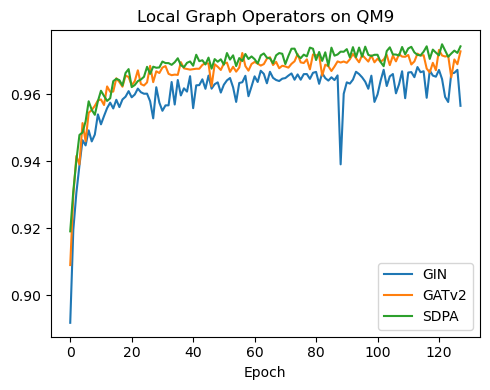

In [31]:
fig, ax = plt.subplots(figsize=(5, 4))

for label, file in conv_files.items():
    ax.plot(pd.read_csv(file)['validation_r2'], label=label)

ax.set_title('Local Graph Operators on QM9')
ax.set_xlabel('Epoch')
ax.legend()

plt.tight_layout()

## By architecture

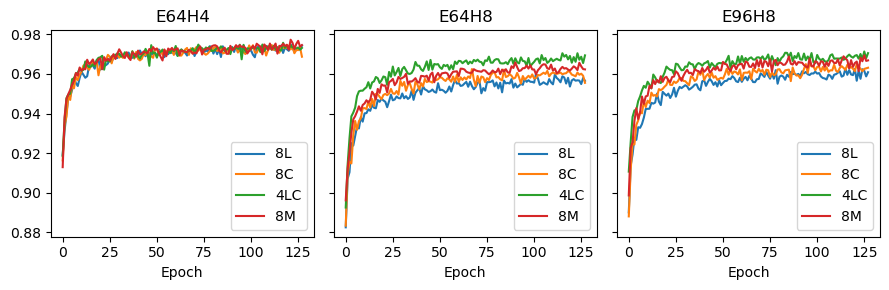

In [32]:
fig, axs = plt.subplots(1, len(architectures), figsize=(len(architectures) * 3, 3), sharey=True)
if len(axs) == 1: axs == axs[axs]

for ax, architecture in zip(axs, architectures):
    max_score = 0
    for stack in stacks:
        log = pd.read_csv(
            f'./{architecture}/{stack}.csv'
        )
        ax.plot(log['validation_r2'], label=stack)
        max_score = max(log['validation_r2'].max(), max_score)

    ax.set_title(architecture)
    ax.set_xlabel('Epoch')
    ax.legend()

plt.tight_layout()

## By stack

8L 0.9749651538993224
8C 0.9745462514149132
4LC 0.9757219448682318
8M 0.9772711813086205


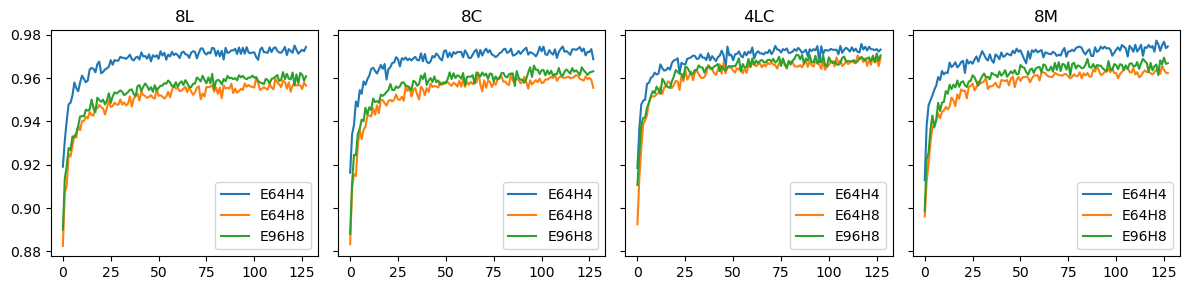

In [33]:
fig, axs = plt.subplots(1, len(stacks), figsize=(len(stacks) * 3, 3), sharey=True)
if len(axs) == 1: axs == axs[axs]

for ax, stack in zip(axs, stacks):
    max_score = 0
    for architecture in architectures:
        log = pd.read_csv(
            f'./{architecture}/{stack}.csv'
        )
        ax.plot(log['validation_r2'], label=architecture)
        max_score = max(log['validation_r2'].max(), max_score)

    print(stack, max_score)
    ax.set_title(stack)
    ax.legend()

plt.tight_layout()